In [ ]:
# 22301068 - Mushfique Tajwar
# 22301130 - Aryan Rayeen Rahman

# CSE422 Section - 4 Spring 2025

### **Importing Libraries and the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.losses import SparseCategoricalCrossentropy

Dataset = https://drive.google.com/file/d/18503AUrsLd25Vd-UgQK8IDy2ZlliKQ5g/view

In [ ]:
# Importing the CSV file
csvfile = pd.read_csv('Healthcare Dataset Stroke Data.csv')

### **EDA**

In [ ]:
csvfile.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
# Determining the Dimensions
shape = csvfile.shape
print("Samples  (Rows) :", shape[0])
print("Features (Cols) :", shape[1])
#print(csvfile.info())

Samples  (Rows) : 5110
Features (Cols) : 12


In [ ]:
csvfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Selecting numerical features
numerical_data = csvfile.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [ ]:
#Selecting categoricalfeatures
categorical_data=csvfile.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 categorical features: 

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
# Transposed stats for numerical features

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
# Transposed stats for categorical features

categorical_data.describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [ ]:
numerical_data.var()

,0
id,4.478185e+08
age,5.113318e+02
hypertension,8.797552e-02
heart_disease,5.110447e-02
avg_glucose_level,2.050601e+03
bmi,6.168636e+01
stroke,4.636264e-02


In [ ]:
numerical_data.skew()

,0
id,-0.019913
age,-0.137059
hypertension,2.715392
heart_disease,3.947244
avg_glucose_level,1.572284
bmi,1.055340
stroke,4.193284


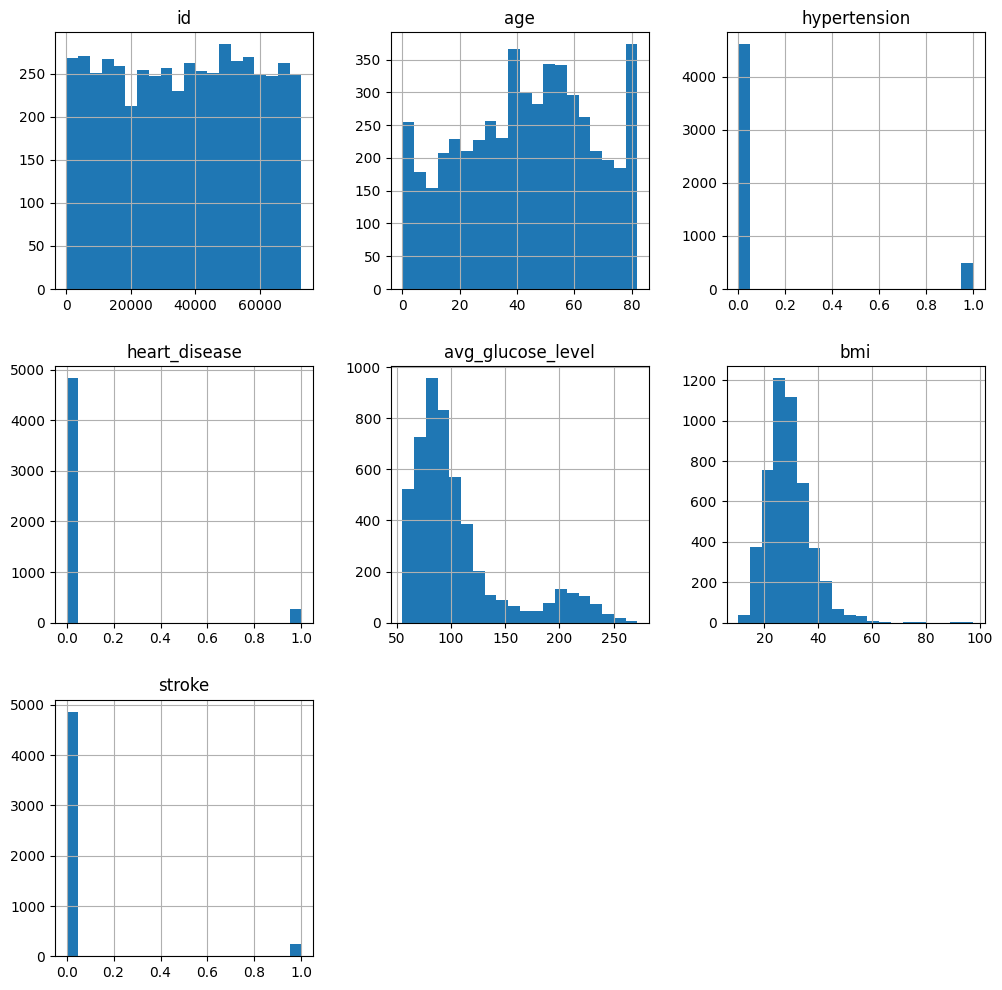

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

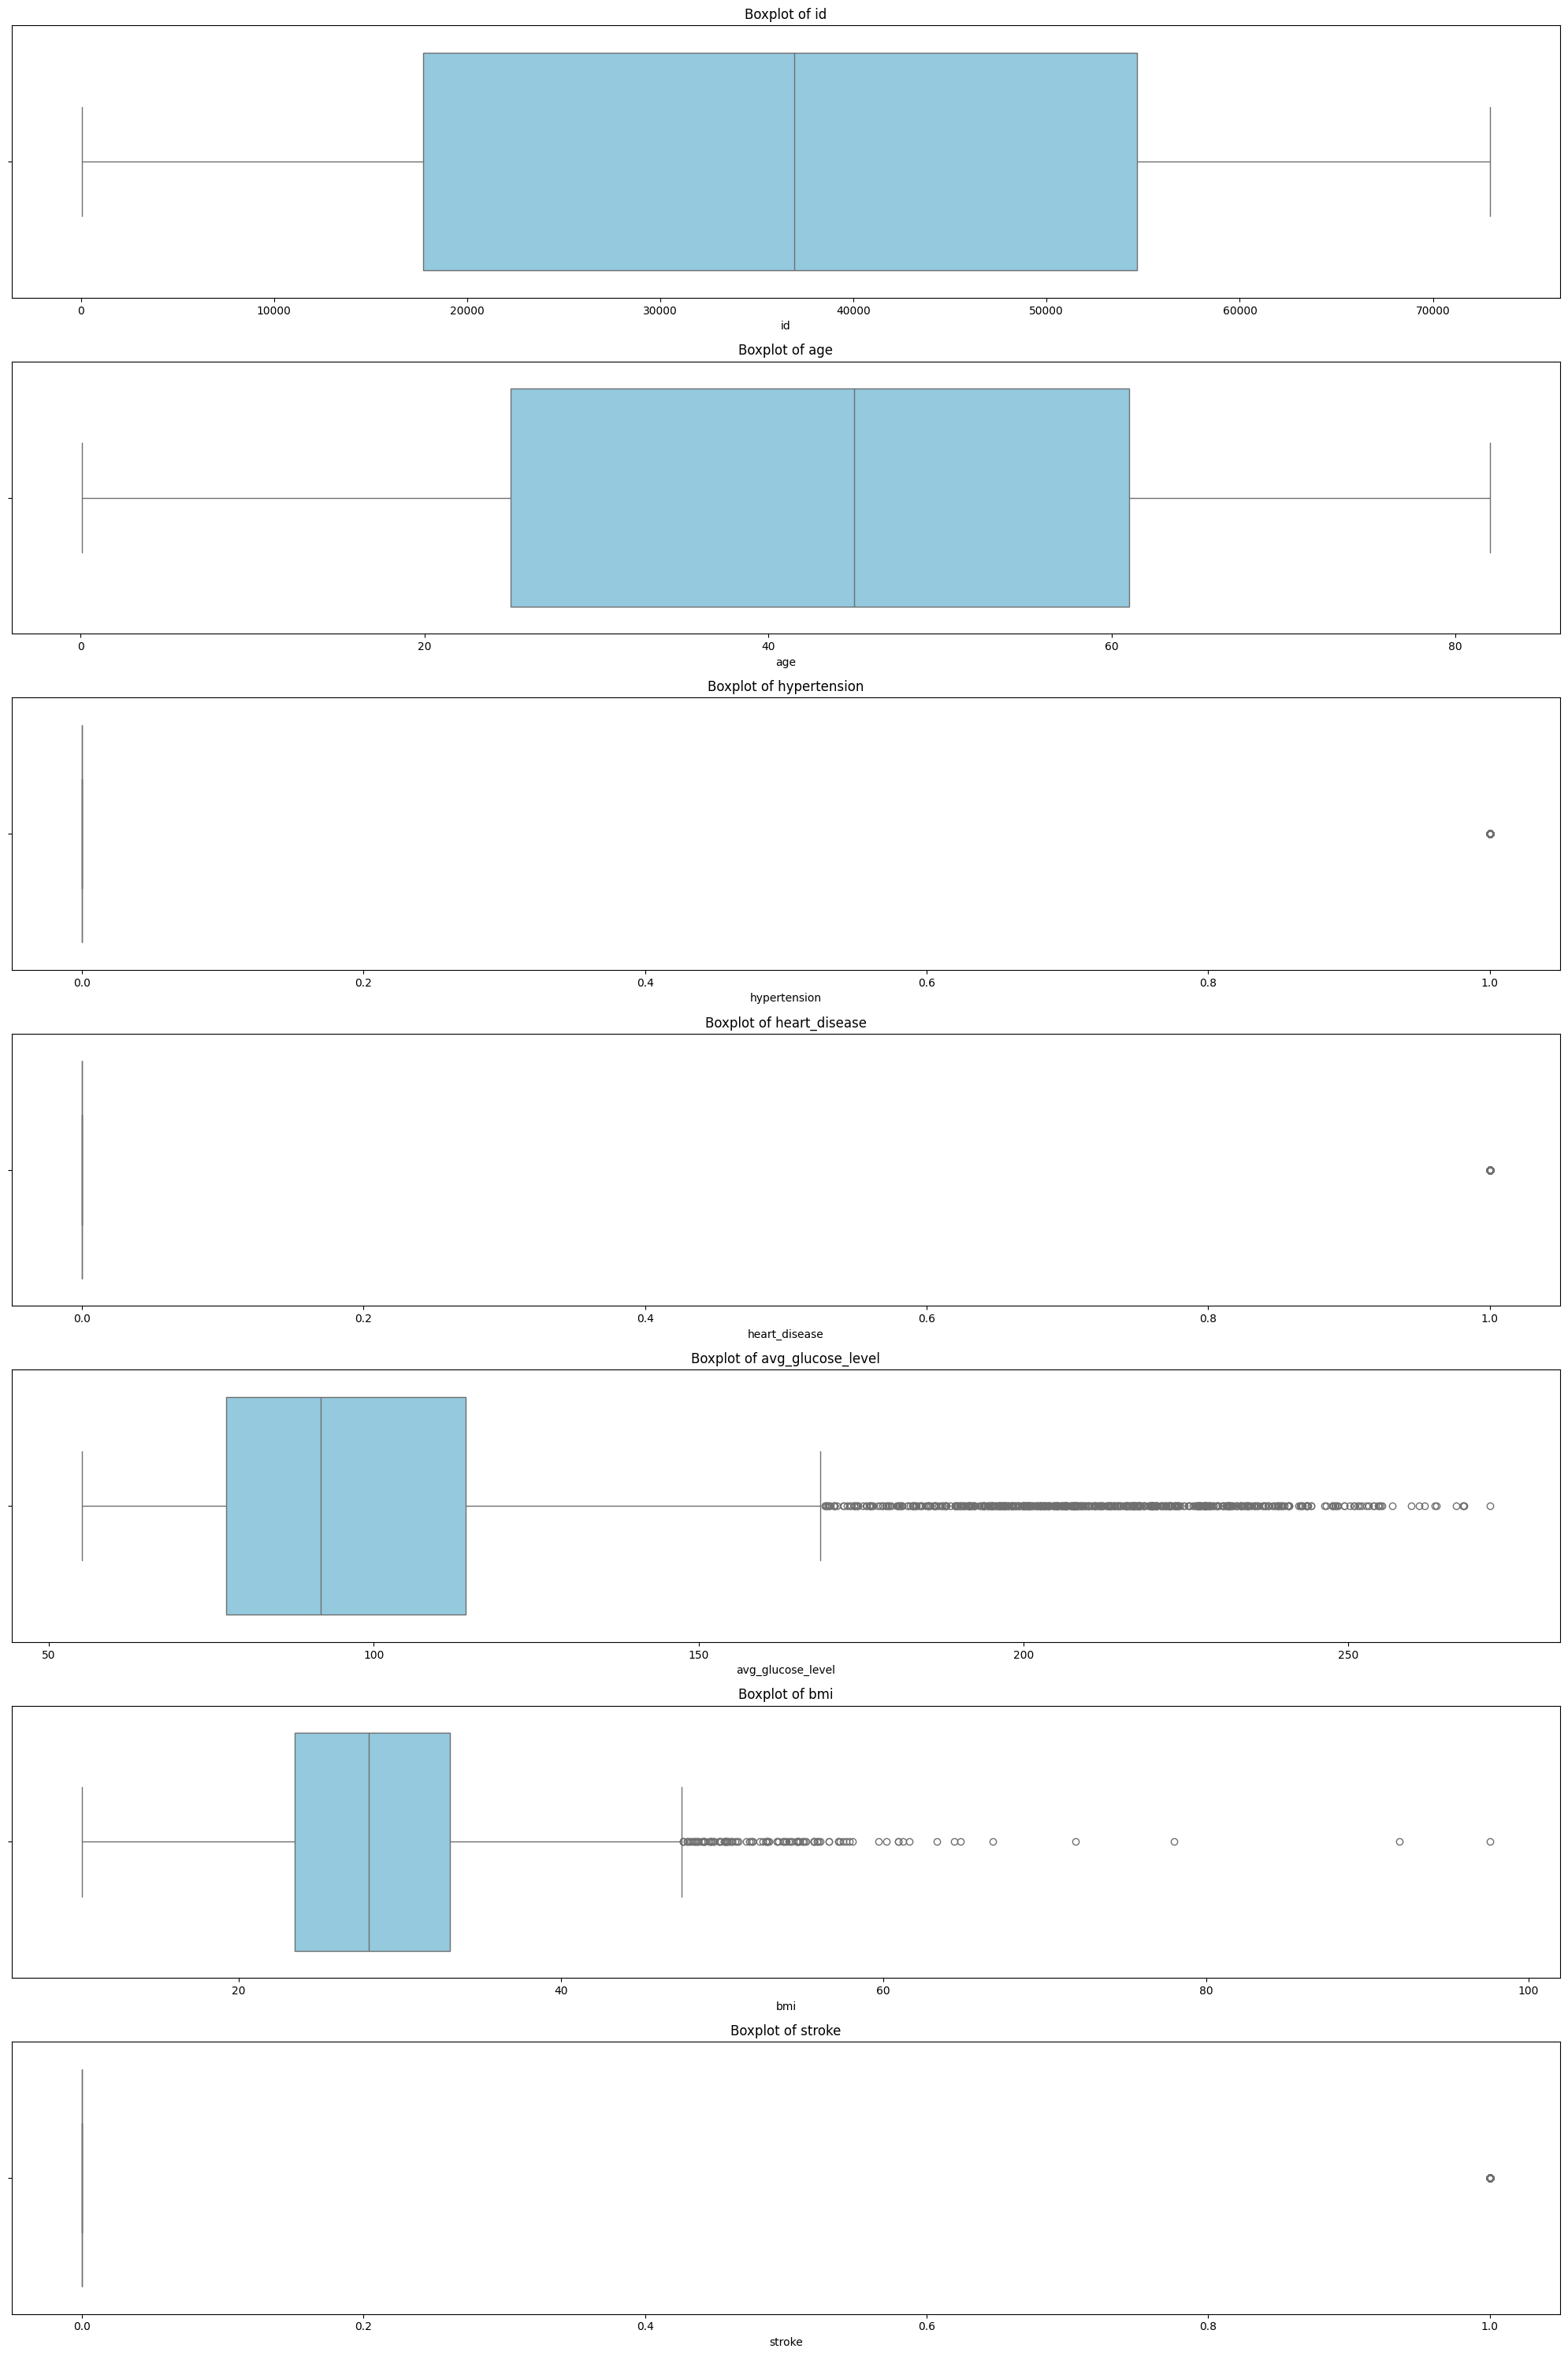

In [ ]:
# Select only numerical columns for boxplot analysis
numeric_cols = csvfile.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=csvfile[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
# Outliers found in bmi and glucose_level

In [ ]:
numerical_data.nunique()

,0
id,5110
age,104
hypertension,2
heart_disease,2
avg_glucose_level,3979
bmi,418
stroke,2


In [ ]:
# Checking null values
csvfile.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64


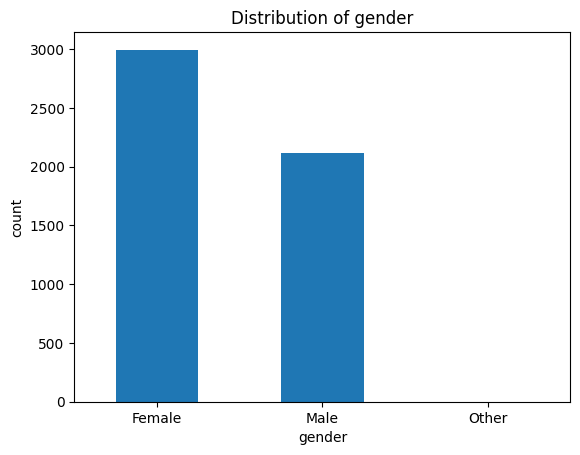

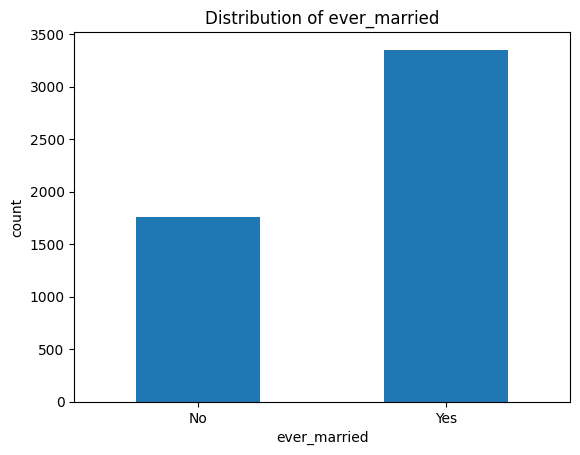

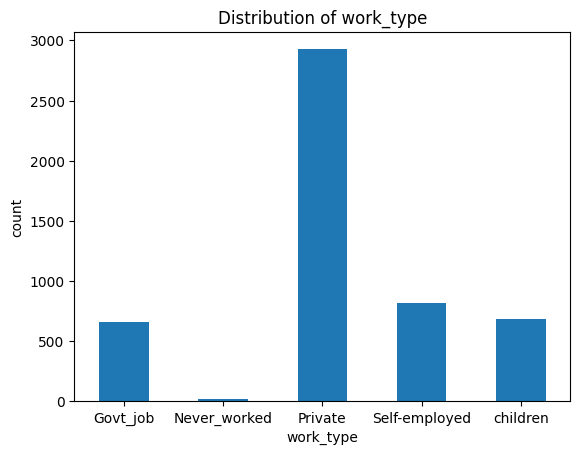

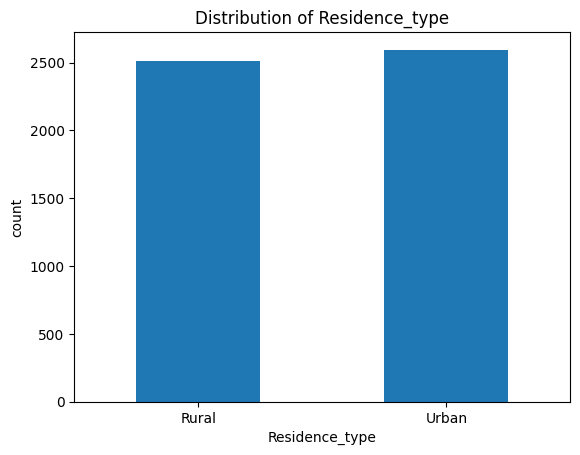

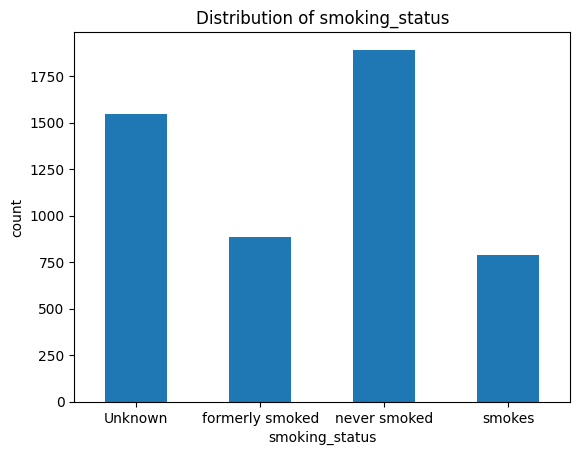

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


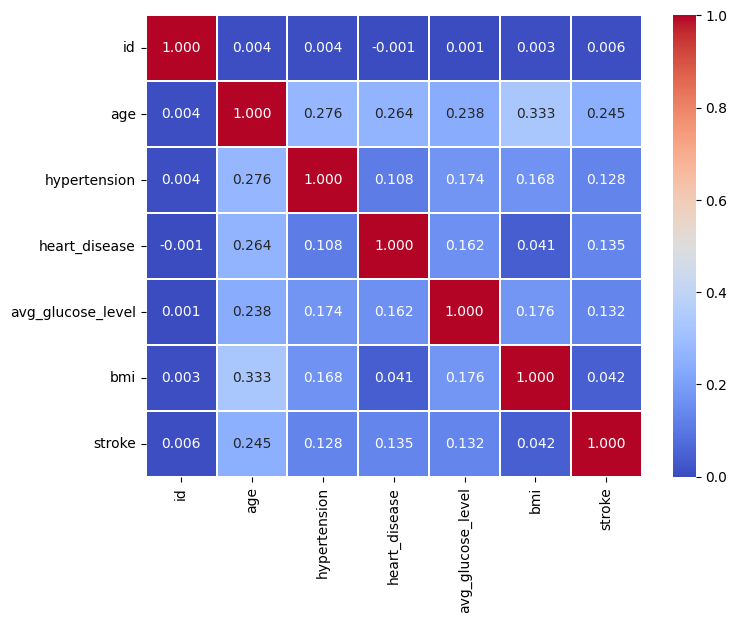

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

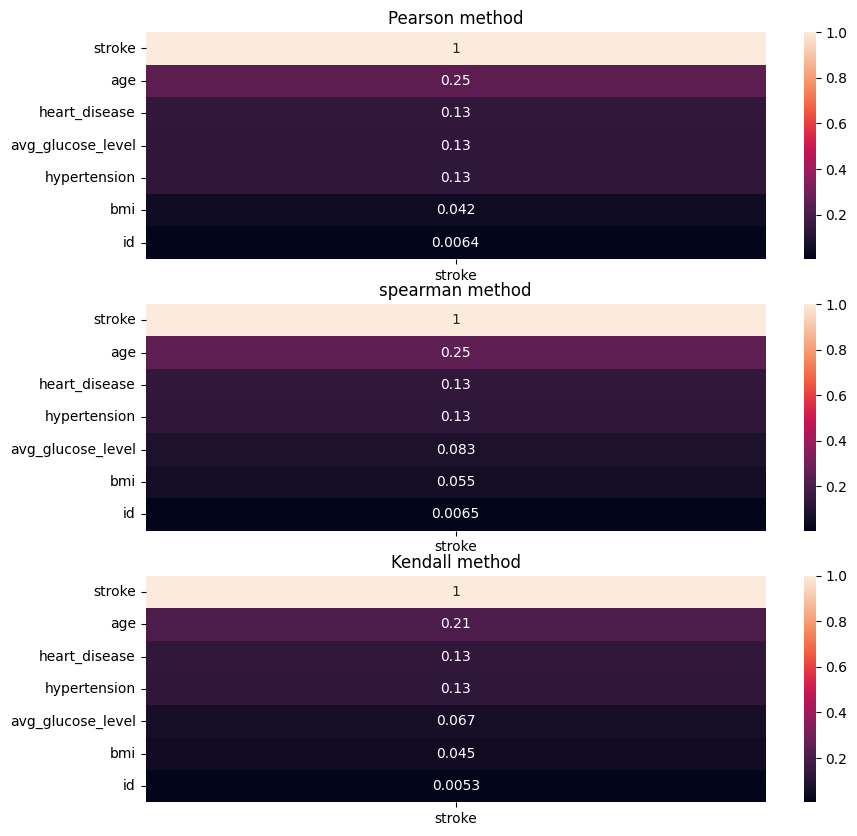

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = numerical_data.corr('pearson')[['stroke']].sort_values(by='stroke', ascending=False)
corr2 = numerical_data.corr('spearman')[['stroke']].sort_values(by='stroke', ascending=False)
corr3 = numerical_data.corr('kendall')[['stroke']].sort_values(by='stroke', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

In [ ]:
# Correlation good becuase all are in positive

In [ ]:
# Check Imbalance in data

# Group instances based on the classes in OUTCOME variable
class_counts=csvfile.groupby("stroke").size()

columns=['Stroke','count','percentage']
stroke=[0,1]
count=list()
percentage=list()

# Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(stroke,count,percentage)),columns=columns)
imbalance_df

,Stroke,count,percentage
0,0,4861,4.629524
1,1,249,0.237143


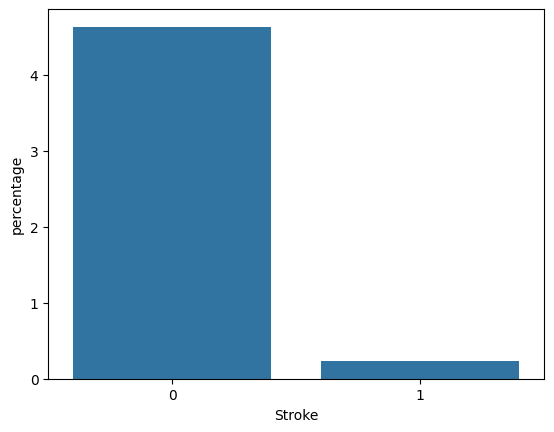

In [ ]:
sns.barplot(data=imbalance_df,x=imbalance_df['Stroke'],y=imbalance_df['percentage'])
plt.show()

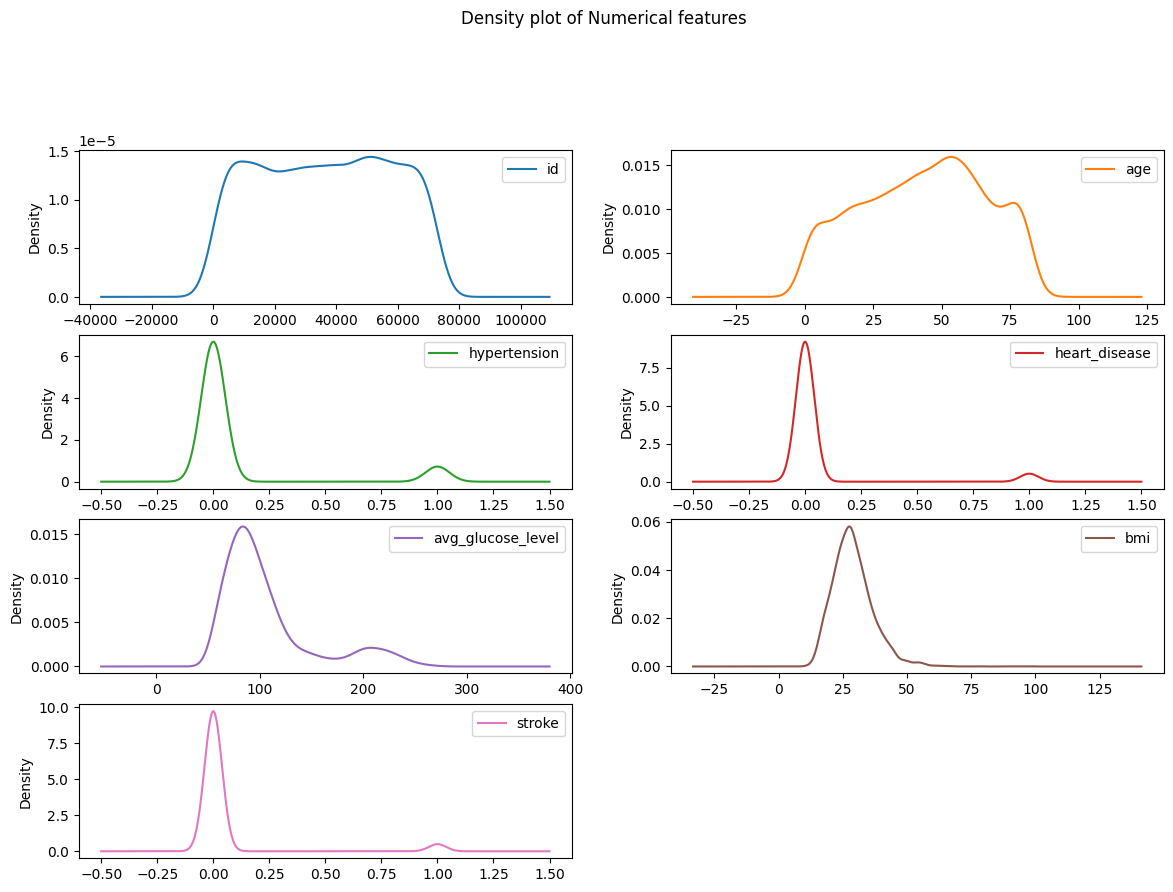

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

###**Preprossessing & Data Splitting**

In [ ]:
# Checking null values
csvfile.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
# Imputing the null values in each column with the averages of that column
impute = SimpleImputer(missing_values=np.nan, strategy='median')
imputing = ['bmi']
for i in imputing:
  csvfile[i] = impute.fit_transform(csvfile[[i]])

In [ ]:
# Removing the 'id','ever_married','work_type' and 'Residence_type' as it logically doesn't make sense
csvfile = csvfile.drop(['id','ever_married','work_type','Residence_type'], axis = 1)

In [ ]:
#Selecting categorical features
categorical_data=csvfile.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 2 categorical features: 

['gender', 'smoking_status']


In [ ]:
# # Encoding to numbers
csvfile['gender'] = csvfile['gender'].map({'Other':2,'Male':1,'Female':0})
csvfile['smoking_status'] = csvfile['smoking_status'].map({'Unknown':3,'smokes':2,'formerly smoked':1,'never smoked':0})

In [ ]:
# Checking
csvfile.head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


In [ ]:
# X = Input, Y = Output
x = csvfile.drop(columns=['stroke'])
y = csvfile['stroke']

In [ ]:
# Feature Scaling

In [ ]:
numerical_data = csvfile.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()
numerical_data.var()

,0
gender,0.243092
age,511.331792
hypertension,0.087976
heart_disease,0.051104
avg_glucose_level,2050.600820
bmi,59.283260
smoking_status,1.582681
stroke,0.046363


In [ ]:
# Scaling removes outliers and adjusts bias

In [ ]:
# Train Test Split
# 30% For testing, 70% For training
# Random State =  5 for splitting in same way everytime
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(3577, 7) (3577,)
(1533, 7) (1533,)


In [ ]:
# MinMax Scaling
scaler = MinMaxScaler()

In [ ]:
# Since imbalanced

In [ ]:
# Scaling train and test inputs
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
csvfile.head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 gender                0.00
age                   0.08
hypertension          0.00
heart_disease         0.00
avg_glucose_level    55.12
bmi                  10.30
smoking_status        0.00
dtype: float64
per-feature maximum before scaling:
 gender                 2.00
age                   82.00
hypertension           1.00
heart_disease          1.00
avg_glucose_level    271.74
bmi                   64.80
smoking_status         3.00
dtype: float64


In [ ]:
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
csvfile.head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


### **Model Training**

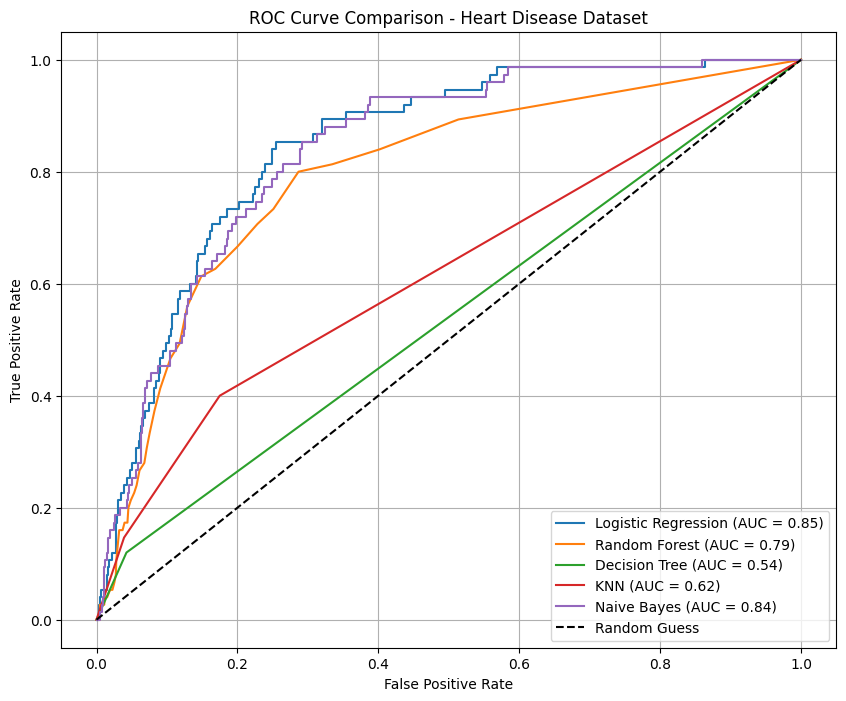

In [ ]:
# Determining which model to use

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs) # ROC & AUC
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Heart Disease Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Logistic Regression puts out the best AUC followed by Random Forest

### **Model Selection/Comparasion analysis**

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)

y_prediction = logistic_model.predict(X_test_scaled)

log_acc = accuracy_score(y_test, y_prediction)
print('Logistic Regression Accuracy =', log_acc)

Logistic Regression Accuracy = 0.7397260273972602


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

rf_acc = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy =', rf_acc)

Random Forest Accuracy = 0.9504240052185258


In [ ]:
# One-hot encode target labels to match TensorFlow's expected input
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the model
input_shape = X_train_scaled.shape[1]
model = Sequential()
model.add(Input(shape=(input_shape,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
# Making sure to not overfeed
model.add(Dense(256, activation='relu'))
# 2 hidden layers ^^
model.add(Dense(2, activation='sigmoid'))
# Output layer activation function

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Evaluate the model
loss, nn_acc = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Accuracy: {nn_acc * 100:.2f}%")

# Predictions
y_pred_probs = model.predict(X_test_scaled)
nn_pred = tf.argmax(y_pred_probs, axis=1).numpy()

# Evaluation
print("Neural Network Accuracy:", nn_acc)

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9334 - loss: 0.2829 - val_accuracy: 0.9330 - val_loss: 0.2454
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9516 - loss: 0.1703 - val_accuracy: 0.9330 - val_loss: 0.2260
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9520 - loss: 0.1657 - val_accuracy: 0.9330 - val_loss: 0.2016
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9477 - loss: 0.1739 - val_accuracy: 0.9330 - val_loss: 0.2004
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9509 - loss: 0.1627 - val_accuracy: 0.9330 - val_loss: 0.2094
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9501 - loss: 0.1681 - val_accuracy: 0.9330 - val_loss: 0.2086
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9566 - loss: 0.1453 - val_accuracy: 0.9330 - val_loss: 0.2004
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9548 - loss: 0.1577 - val_accuracy: 0.

### **Comparasion**

In [ ]:
print('Logistic Regression Accuracy =', log_acc)
print('Random Forest Accuracy       =', rf_acc )
print('Neural Network Accuracy      =', nn_acc )

Logistic Regression Accuracy = 0.7397260273972602
Random Forest Accuracy       = 0.9504240052185258
Neural Network Accuracy      = 0.951076328754425


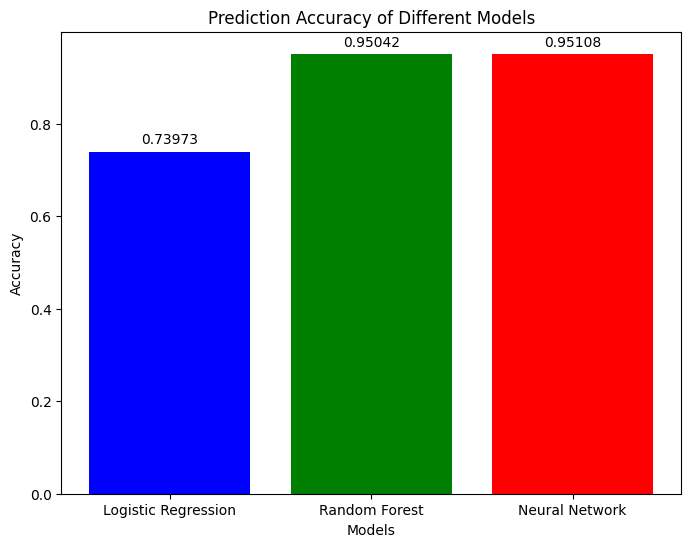

In [ ]:
# Assuming you have accuracy scores for each model
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracy_scores = [log_acc, rf_acc, nn_acc]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.5f}', ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
# Interpretetion i.e. Evaluation
labels = sorted(y.unique())
print("Logistic Regression:")
print()
print(classification_report(y_test, y_prediction, target_names=[str(l) for l in labels], zero_division=0))
print("------------------------------------------------------")
print()
print("Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=[str(l) for l in labels], zero_division=0))
print("------------------------------------------------------")
print()
print("Neural Network:")
print(classification_report(y_test, nn_pred, target_names=[str(l) for l in labels], zero_division=0))

Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1458
           1       0.14      0.85      0.24        75

    accuracy                           0.74      1533
   macro avg       0.57      0.79      0.54      1533
weighted avg       0.95      0.74      0.81      1533

------------------------------------------------------

Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.33      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533

------------------------------------------------------

Neural Network:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy     

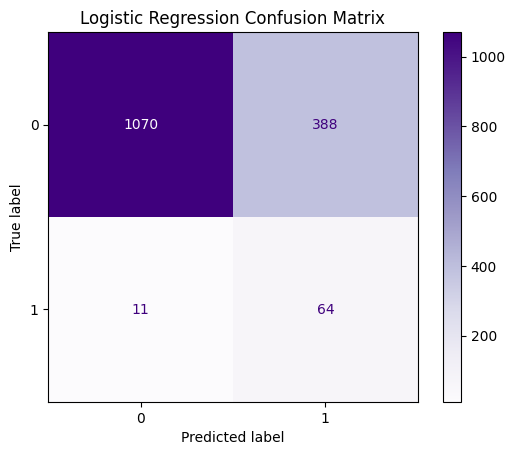

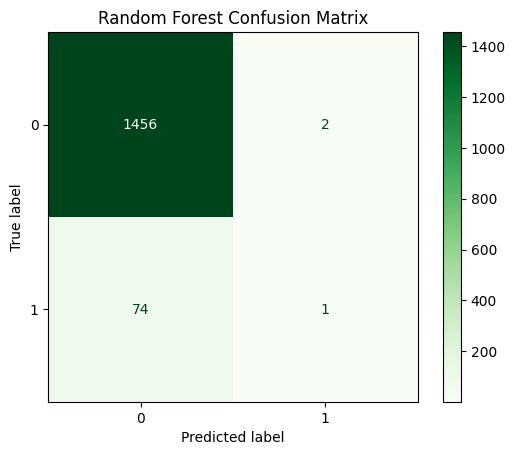

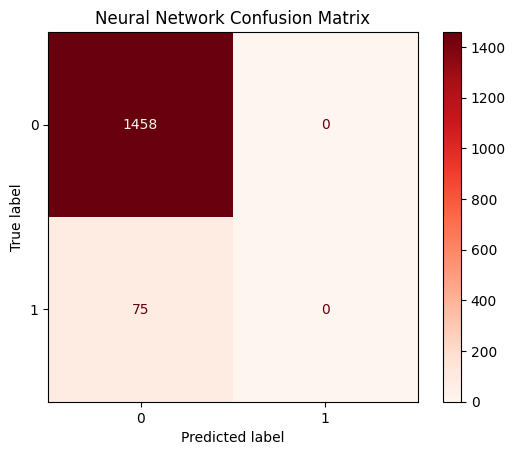

Logistic Regression Accuracy: 0.7397260273972602
Random Forest Accuracy: 0.9504240052185258
Neural Network Accuracy: 0.9510763209393346


In [ ]:
#Confusion Matrix

labels = sorted(y.unique())

# Logistic Reg
cm_log = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay(cm_log, display_labels=labels).plot(cmap="Purples")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=labels).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Neural Network
cm_nn = confusion_matrix(y_test, nn_pred)
ConfusionMatrixDisplay(cm_nn, display_labels=labels).plot(cmap="Reds")
plt.title("Neural Network Confusion Matrix")
plt.show()

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_prediction))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9507 - loss: 0.2981
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


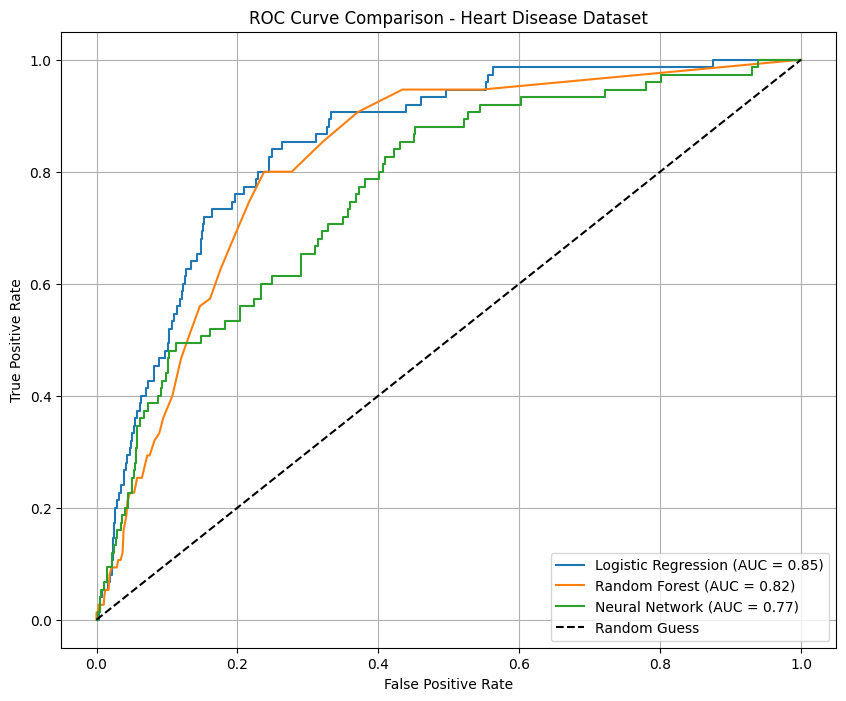

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": Sequential()
}

input_shape = X_train_scaled.shape[1]
models["Neural Network"].add(Input(shape=(input_shape,)))
# Increases neurons
models["Neural Network"].add(Dense(512, activation='relu'))
models["Neural Network"].add(Dropout(0.3))
models["Neural Network"].add(Dense(256, activation='relu'))
models["Neural Network"].add(Dense(1, activation='sigmoid'))

models["Neural Network"].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    if name == 'Neural Network':
        y_probs = model.predict(X_test_scaled)
    else:
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs) # ROC & AUC
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Heart Disease Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()